This file is to test for distributions and how we can plot stuff.

Import all necessary libraries.

In [1]:
import random # Used for random generation of points
import matplotlib
import matplotlib.pyplot as plt # Used for visualization of distributions and classifiction
# import numpy as np 
import pandas as pd # Used for simplification of plotting points
import math # Used for various math utilities

Random distribution of points in a 1x1 box.

In [2]:
def generateSingleSquareRandomDistribution():
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    df = pd.DataFrame({'x': [0], 'y': [0]})
    for _ in range(1000):
        plt.plot(random.random(), random.random(), marker='o', markersize=2, color="red")

# generateSingleSquareRandomDistribution()

2 random distributions of points in a 1x1 box. 

In [3]:
def generateDoubleSquareRandomDistribution():
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    df = pd.DataFrame({'x': [0], 'y': [0]})
    for _ in range(1000):
        plt.plot(random.random(), random.random(), marker='o', markersize=2, color="red")
        plt.plot(random.random(), random.random(), marker='o', markersize=2, color="blue")

# generateDoubleSquareRandomDistribution()

Random distribution of points in a circle of radius 1.

In [4]:
def generateSingleCircleDistribution():
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    cluster_x, cluster_y = 0, 0
    df = pd.DataFrame({'x': [cluster_x], 'y': [cluster_y]})

    circle_r = 0.5
    circle_x = 0.5
    circle_y = 0.5

    for _ in range(1000):
        alpha = 2 * math.pi * random.random()
        r = circle_r * math.sqrt(random.random())
        x = r * math.cos(alpha) + circle_x
        y = r * math.sin(alpha) + circle_y
        plt.plot(cluster_x + x, cluster_y + y, marker='o', markersize=2, color="blue")

# generateSingleCircleDistribution()

Distribution of points in 1 circle and 1 box, overlaid on top of each other.

In [5]:
def generateSingleCircleAndSingleSquareDistribution():
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    cluster_x, cluster_y = 0, 0
    df = pd.DataFrame({'x': [cluster_x], 'y': [cluster_y]})

    circle_r = 0.5
    circle_x = 0.5
    circle_y = 0.5

    for _ in range(1000):
        alpha = 2 * math.pi * random.random()
        r = circle_r * math.sqrt(random.uniform(0, 0.2))
        x = r * math.cos(alpha) + circle_x
        y = r * math.sin(alpha) + circle_y
        plt.plot(cluster_x + x, cluster_y + y, marker='o', markersize=2, color="blue")
        plt.plot(random.random(), random.random(), marker='o', markersize=2, color="red")

# generateSingleCircleAndSingleSquareDistribution()

Distribution of points in multiple circles and 1 box, overlaid on top of each other.

In [36]:
def visualizeMCSD(cluster_map, df):
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    for idx, row in df.iterrows():
        plt.plot(row['x'], row['y'], marker='o', markersize=2, color=row['color'])

    return

def generateMultipleCircleAndSquareDistribution(number_of_clusters=random.randint(2, 4), number_of_points = 1000):
    # number_of_clusters = random.randint(2, 4)

    df = pd.DataFrame({'x': [], 'y': [], 'color': []})

    cluster_map = {}
    for cluster_num in range(number_of_clusters):
        cluster_map[cluster_num] =  [random.uniform(0, 0.5), random.uniform(0, 0.5), random.uniform(0, 0.5)]  

    for cluster in cluster_map.keys():
        cluster_x, cluster_y, cluster_r = cluster_map[cluster]
        color = "#" + "%06x" % random.randint(0, 0xFFFFFF)
        new_cluster_df = pd.DataFrame({'x': [], 'y': [], 'color': []})
        for _ in range(int(number_of_points * 0.25)):
            alpha = 2 * math.pi * random.random()
            r = cluster_r * math.sqrt(random.uniform(0, 0.1))
            x = r * math.cos(alpha) + cluster_x
            y = r * math.sin(alpha) + cluster_y
            bound_x = max(0, min(1, x))
            bound_y = max(0, min(1, y))
            new_cluster_df = new_cluster_df.append(pd.DataFrame({'x': bound_x, 'y': [bound_y], 'color': [color]}))
        df = df.append(new_cluster_df)

    red_point_df = pd.DataFrame({'x': [], 'y': [], 'color': []})
    for _ in range(number_of_points):
        red_point_df = red_point_df.append(pd.DataFrame({'x': [random.random()], 'y': [random.random()], 'color': ["red"]}))
    df = df.append(red_point_df)

    visualizeMCSD(cluster_map, df)
    return cluster_map, df

# generateMultipleCircleAndSquareDistribution(1, 1000)

177
8


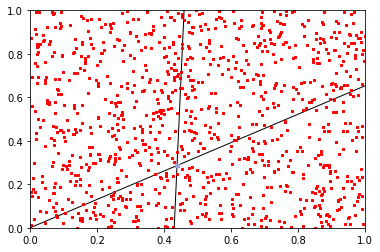

In [20]:
def visualizeSCSD(cluster_map, df, center, anchor):
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.axline(anchor, center, linewidth=1, color='black')
    for idx, row in df.iterrows():
        plt.plot(row['x'], row['y'], marker='o', markersize=2, color=row['color'])
    return

def splitSingleCircleAndSquareDistribution(split_increment=0.01):
    cluster_map, points_df = generateMultipleCircleAndSquareDistribution(1, 1000)

    center = tuple(cluster_map[0][:2])
    anchor = (0, 0)

    abs_diff = float("inf")
    best_anchor = anchor
    while anchor[1] < 1 and anchor[0] < 1:
        while anchor[1] < 1:
            total = 0
            slope = 0
            if center[0] != 0:
                slope = (center[1] - anchor[1]) / (center[0] - anchor[0])

            if slope == 0:
                for idx, point in points_df.iterrows():
                    if point['y'] < center[1] and point['color'] == "red":
                        total += 1
            else:
                for idx, point in points_df.iterrows():
                    if point['y'] < slope * point['x'] + anchor[1] and point['color'] == "red":
                        total += 1

            if abs(total - 500) < abs_diff:
                abs_diff = abs(total - 500)
                best_anchor = anchor

            anchor = (0, anchor[1] + split_increment)

        visualizeSCSD(cluster_map, points_df, center, best_anchor)
        print(abs_diff)

        while anchor[0] < 1:
            total = 0
            slope = 0
            if center[0] != 0:
                slope = (center[0] - anchor[0]) / (center[1] - anchor[1])

            if slope == 0:
                for idx, point in points_df.iterrows():
                    if point['y'] < center[1] and point['color'] == "red":
                        total += 1
            else:
                for idx, point in points_df.iterrows():
                    if point['x'] < slope * point['y'] + anchor[0] and point['color'] == "red":
                        total += 1

            if abs(total - 500) < abs_diff:
                abs_diff = abs(total - 500)
                best_anchor = anchor

            anchor = (anchor[0] + split_increment, 1)
        
        visualizeSCSD(cluster_map, points_df, center, best_anchor)
        print(abs_diff)

    return 

splitSingleCircleAndSquareDistribution()

0
1500 1500
1500 3000
1500 4500
3000 7500
7500 3000
0
23
31


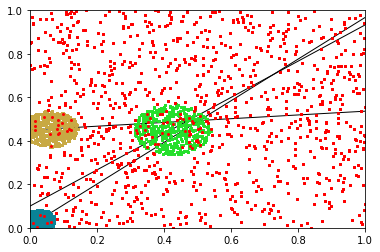

In [37]:
def splitMultipleCircleAndSquareDistribution():
    cluster_map, points_df = generateMultipleCircleAndSquareDistribution(3, 2000)
    number_of_points = points_df.size

    red_points_df = points_df.loc[points_df['color'] == 'red']
    number_of_red_points = red_points_df.size

    centers = []
    for cluster in cluster_map.keys():
        centers.append(cluster_map[cluster][:2])

    for center in centers:
        center = tuple(center)
        anchor = (0, 0)

        abs_diff = float("inf")
        best_anchor = (0, 0)
        while abs_diff != 0 and anchor[1] < 1:
            total = 0
            slope = 0
            if center[0] != 0:
                slope = (center[1] - anchor[1]) / (center[0] - anchor[0])

            if slope == 0:
                for idx, point in red_points_df.iterrows():
                    if point['y'] < center[1]:
                        total += 1
            else:
                for idx, point in red_points_df.iterrows():
                    if point['y'] < slope * point['x'] + anchor[1]:
                        total += 1

            if abs(total - 500) < abs_diff:
                abs_diff = abs(total - 500)
                best_anchor = anchor

            anchor = (0, anchor[1] + 0.01)

        while abs_diff != 0 and anchor[0] < 1:
            total = 0
            slope = 0
            if center[0] != 0:
                slope = (center[0] - anchor[0]) / (center[1] - anchor[1])

            if slope == 0:
                for idx, point in red_points_df.iterrows():
                    if point['y'] < center[1]:
                        total += 1
            else:
                for idx, point in red_points_df.iterrows():
                    if point['x'] < -slope * point['y'] + anchor[0]:
                        total += 1

            if abs(total - 500) < abs_diff:
                abs_diff = abs(total - 500)
                best_anchor = anchor

            anchor = (anchor[0] + 0.01, 1)

        while abs_diff != 0 and anchor[1] > 0:
            total = 0
            slope = 0
            if center[0] != 0:
                slope = (center[0] - anchor[0]) / (center[1] - anchor[1])

            if slope == 0:
                for idx, point in red_points_df.iterrows():
                    if point['y'] < center[1]:
                        total += 1
            else:
                for idx, point in red_points_df.iterrows():
                    if point['y'] < -slope * point['x'] + anchor[1]:
                        total += 1

            if abs(total - 500) < abs_diff:
                abs_diff = abs(total - 500)
                best_anchor = anchor

            anchor = (1, anchor[1] - 0.01)

        while abs_diff != 0 and anchor[0] > 0:
            total = 0
            slope = 0
            if center[0] != 0:
                slope = (center[0] - anchor[0]) / (center[1] - anchor[1])

            if slope == 0:
                for idx, point in red_points_df.iterrows():
                    if point['y'] < center[1]:
                        total += 1
            else:
                for idx, point in red_points_df.iterrows():
                    if point['x'] < slope * point['y'] + anchor[0]:
                        total += 1

            if abs(total - 500) < abs_diff:
                abs_diff = abs(total - 500)
                best_anchor = anchor

            anchor = (anchor[0] - 0.01, 0)
            
        visualizeSCSD(cluster_map, points_df, center, best_anchor)

    return

splitMultipleCircleAndSquareDistribution()